# Testing code during development 

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Reading data

In [2]:
from demand_forecasting.read import read_data

# reading voiholm rode data 
rides_raw_df = read_data('../input/voiholm.csv')

# reading weather data
weather_raw_df = read_data('../input/weather_data.csv')

INFO:root:Read dataframe from file path ../input/voiholm.csv
INFO:root:Read dataframe from file path ../input/weather_data.csv


In [3]:
from demand_forecasting.verify import verify_ride_df, verify_weather_df

# verifying the dataframes 
rides_df = verify_ride_df(rides_raw_df)
weather_df = verify_weather_df(weather_raw_df)

INFO:root:Validated Voiholm ride dataframe
INFO:root:Validated weather dataframe


### Preprocessing data

In [4]:
from demand_forecasting.preprocess import preprocessing

preprocess_raw_df = preprocessing(rides_df=rides_df, weather_df=weather_df)

INFO:root:Preprossed dataframe


In [5]:
from demand_forecasting.verify import verify_preprocessed_df
preprocess_df = verify_preprocessed_df(preprocess_raw_df) #df
preprocess_df

INFO:root:Validated preprocessed dataframe


,h3index_small,start_date,num_of_rides,date,temperature,max_temperature,min_temperature,precipitation,start_weekday
0,891f2506107ffff,2020-08-01,0,2020-08-01,17.6,19.3,15.6,0.69,Saturday
1,891f2506107ffff,2020-08-02,0,2020-08-02,16.7,19.1,14.8,0.00,Sunday
2,891f2506107ffff,2020-08-03,1,2020-08-03,16.8,19.6,14.3,0.00,Monday
3,891f2506107ffff,2020-08-04,2,2020-08-04,15.0,17.1,12.8,11.44,Tuesday
4,891f2506107ffff,2020-08-05,2,2020-08-05,21.5,26.5,17.0,0.50,Wednesday
...,...,...,...,...,...,...,...,...,...
9775,891f25a9ecbffff,2020-08-26,0,2020-08-26,16.7,20.8,13.5,0.00,Wednesday
9776,891f25a9ecbffff,2020-08-27,0,2020-08-27,13.9,18.5,9.1,0.60,Thursday
9777,891f25a9ecbffff,2020-08-28,0,2020-08-28,14.5,17.8,12.1,0.10,Friday
9778,891f25a9ecbffff,2020-08-29,1,2020-08-29,14.7,19.8,8.9,0.00,Saturday


In [6]:
from demand_forecasting.preprocess import extract_all_unique_h3index_small_areas

unique_h3index_df = extract_all_unique_h3index_small_areas(rides_df)
unique_h3index_df

,h3index_small
0,891f2506107ffff
1,891f2506123ffff
2,891f2506127ffff
3,891f250612bffff
4,891f250612fffff
...,...
321,891f25a9eafffff
322,891f25a9eb3ffff
323,891f25a9eb7ffff
324,891f25a9ebbffff


### Generating features

In [10]:
from demand_forecasting.features import generate_features_for_training

df_with_features = generate_features_for_training(preprocess_df)
df_with_features

INFO:root:Generated features for training dataset


,h3index_small,start_date,num_of_rides,date,temperature,max_temperature,min_temperature,precipitation,start_weekday,avg_num_rides_in_area_one_week_before
0,891f2506107ffff,2020-08-01,0,2020-08-01,17.6,19.3,15.6,0.69,Saturday,NaN
1,891f2506107ffff,2020-08-02,0,2020-08-02,16.7,19.1,14.8,0.00,Sunday,NaN
2,891f2506107ffff,2020-08-03,1,2020-08-03,16.8,19.6,14.3,0.00,Monday,NaN
3,891f2506107ffff,2020-08-04,2,2020-08-04,15.0,17.1,12.8,11.44,Tuesday,NaN
4,891f2506107ffff,2020-08-05,2,2020-08-05,21.5,26.5,17.0,0.50,Wednesday,NaN
...,...,...,...,...,...,...,...,...,...,...
9775,891f25a9ecbffff,2020-08-26,0,2020-08-26,16.7,20.8,13.5,0.00,Wednesday,0.285714
9776,891f25a9ecbffff,2020-08-27,0,2020-08-27,13.9,18.5,9.1,0.60,Thursday,0.285714
9777,891f25a9ecbffff,2020-08-28,0,2020-08-28,14.5,17.8,12.1,0.10,Friday,0.285714
9778,891f25a9ecbffff,2020-08-29,1,2020-08-29,14.7,19.8,8.9,0.00,Saturday,0.142857


In [1]:
from tests.test_features import generate_test_data

test_df = generate_test_data()
test_df

,h3index_small,start_date,num_of_rides,date,temperature,max_temperature,min_temperature,precipitation,start_weekday
0,891f25a9ecbffff,2020-08-23,5,2020-08-23,14.8,21.0,11.3,0.0,Sunday
1,891f25a9ecbffff,2020-08-24,10,2020-08-24,15.9,20.8,14.3,0.0,Monday
2,891f25a9ecbffff,2020-08-25,11,2020-08-25,16.3,18.5,13.2,0.0,Tuesday
3,891f25a9ecbffff,2020-08-26,12,2020-08-26,17.5,18.8,9.1,0.6,Wednesday
4,891f25a9ecbffff,2020-08-27,10,2020-08-27,15.5,19.8,12.1,0.1,Thursday
5,891f25a9ecbffff,2020-08-28,14,2020-08-28,13.8,21.2,8.9,0.0,Friday
6,891f25a9ecbffff,2020-08-29,8,2020-08-29,14.6,21.4,10.1,0.0,Saturday
7,891f25a9ecbffff,2020-08-30,6,2020-08-30,14.8,18.6,11.5,0.0,Sunday


In [3]:
from demand_forecasting.features import generate_features_for_training
test_with_features_df = generate_features_for_training(test_df)

,h3index_small,start_date,num_of_rides,date,temperature,max_temperature,min_temperature,precipitation,start_weekday,avg_num_rides_in_area_one_week_before
0,891f25a9ecbffff,2020-08-23,5,2020-08-23,14.8,21.0,11.3,0.0,Sunday,NaN
1,891f25a9ecbffff,2020-08-24,10,2020-08-24,15.9,20.8,14.3,0.0,Monday,NaN
2,891f25a9ecbffff,2020-08-25,11,2020-08-25,16.3,18.5,13.2,0.0,Tuesday,NaN
3,891f25a9ecbffff,2020-08-26,12,2020-08-26,17.5,18.8,9.1,0.6,Wednesday,NaN
4,891f25a9ecbffff,2020-08-27,10,2020-08-27,15.5,19.8,12.1,0.1,Thursday,NaN
5,891f25a9ecbffff,2020-08-28,14,2020-08-28,13.8,21.2,8.9,0.0,Friday,NaN
6,891f25a9ecbffff,2020-08-29,8,2020-08-29,14.6,21.4,10.1,0.0,Saturday,NaN
7,891f25a9ecbffff,2020-08-30,6,2020-08-30,14.8,18.6,11.5,0.0,Sunday,10.0


In [6]:
test_with_features_df

10.0

# Modelling

In [8]:
target_variable = 'num_of_rides'
features = ['precipitation', 'start_weekday', 'max_temperature', 'avg_num_rides_in_area_one_week_before']

### XGboost

In [9]:
from demand_forecasting.train import training_xgb_model

model = training_xgb_model(df_with_features,
                           target_variable=target_variable,
                            features=features,
                            max_depth=3,
                            learning_rate=0.1,
                            n_estimators=100)

model

INFO:root:Trained XGB model


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Interference 

In [8]:
from dateutil.relativedelta import relativedelta

date_of_prediction = pd.to_datetime(os.environ.get('PREDICTION_DATE'))

date_one_week_before = date_of_prediction - relativedelta(days = 7)
date_one_week_before

Timestamp('2020-08-24 00:00:00')

In [9]:
#  # #  Get feature data for the date of prediction  # # #

inference_df = unique_h3index_df[['h3index_small']].copy()
inference_df['start_date'] = date_of_prediction
inference_df['start_weekday'] =  inference_df.start_date.dt.day_name()
inference_df['start_weekday'] =  inference_df.start_weekday.astype("category")

# # #  Extracting avg num rides in each area one week before  # # #
df_one_week_before_df = df[df.start_date >= date_one_week_before]

avg_num_of_rides_per_area_df = df_one_week_before_df.groupby('h3index_small').agg({'num_of_rides':'mean'}).reset_index()
avg_num_of_rides_per_area_df.rename(columns={'num_of_rides':'avg_num_rides_in_area_one_week_before'}, inplace=True)

# Adding avg num rides in each area one week before to dataframe 
inference_df = pd.merge(inference_df, avg_num_of_rides_per_area_df, on='h3index_small', how='left')

# # #   Get weather forecast for next day  # # #
# this should call an external API during night to get the weather forecast for the area for the next day. 
# since this case doesn't provide the location of Voiholm I can't implement this now 

# lets here assume the weather forecast we get for next day is accurate, and let's use the data we have in weather_data.csv for the 2020-08-31)

weather_at_prediciton_date_df = weather_df[weather_df.date == date_of_prediction]

inference_df = pd.merge(inference_df, weather_at_prediciton_date_df, left_on= 'start_date', right_on='date', how='left') 
inference_df

,h3index_small,start_date,start_weekday,avg_num_rides_in_area_one_week_before,date,temperature,max_temperature,min_temperature,precipitation
0,891f2506107ffff,2020-08-31,Monday,1.000000,2020-08-31,14.7,21.5,7.1,0.0
1,891f2506123ffff,2020-08-31,Monday,10.285714,2020-08-31,14.7,21.5,7.1,0.0
2,891f2506127ffff,2020-08-31,Monday,6.714286,2020-08-31,14.7,21.5,7.1,0.0
3,891f250612bffff,2020-08-31,Monday,1.714286,2020-08-31,14.7,21.5,7.1,0.0
4,891f250612fffff,2020-08-31,Monday,14.142857,2020-08-31,14.7,21.5,7.1,0.0
...,...,...,...,...,...,...,...,...,...
321,891f25a9eafffff,2020-08-31,Monday,20.857143,2020-08-31,14.7,21.5,7.1,0.0
322,891f25a9eb3ffff,2020-08-31,Monday,1.857143,2020-08-31,14.7,21.5,7.1,0.0
323,891f25a9eb7ffff,2020-08-31,Monday,19.428571,2020-08-31,14.7,21.5,7.1,0.0
324,891f25a9ebbffff,2020-08-31,Monday,9.857143,2020-08-31,14.7,21.5,7.1,0.0


In [10]:
from demand_forecasting.features import generate_features_for_inference

inference_with_features_df = generate_features_for_inference(unique_h3index_df, df, weather_df) 
inference_with_features_df

INFO:root:Generated features for interference


,h3index_small,start_date,start_weekday,avg_num_rides_in_area_one_week_before,date,temperature,max_temperature,min_temperature,precipitation
0,891f2506107ffff,2020-08-31,Monday,1.000000,2020-08-31,14.7,21.5,7.1,0.0
1,891f2506123ffff,2020-08-31,Monday,10.285714,2020-08-31,14.7,21.5,7.1,0.0
2,891f2506127ffff,2020-08-31,Monday,6.714286,2020-08-31,14.7,21.5,7.1,0.0
3,891f250612bffff,2020-08-31,Monday,1.714286,2020-08-31,14.7,21.5,7.1,0.0
4,891f250612fffff,2020-08-31,Monday,14.142857,2020-08-31,14.7,21.5,7.1,0.0
...,...,...,...,...,...,...,...,...,...
321,891f25a9eafffff,2020-08-31,Monday,20.857143,2020-08-31,14.7,21.5,7.1,0.0
322,891f25a9eb3ffff,2020-08-31,Monday,1.857143,2020-08-31,14.7,21.5,7.1,0.0
323,891f25a9eb7ffff,2020-08-31,Monday,19.428571,2020-08-31,14.7,21.5,7.1,0.0
324,891f25a9ebbffff,2020-08-31,Monday,9.857143,2020-08-31,14.7,21.5,7.1,0.0


In [11]:
from demand_forecasting.predict import predict

final_df = predict(inference_with_features_df, features, model)

final_df

INFO:root:Made predictions


,h3index_small,date,predicted_num_of_rides
0,891f2506107ffff,2020-08-31,1
1,891f2506123ffff,2020-08-31,11
2,891f2506127ffff,2020-08-31,8
3,891f250612bffff,2020-08-31,2
4,891f250612fffff,2020-08-31,15
...,...,...,...
321,891f25a9eafffff,2020-08-31,25
322,891f25a9eb3ffff,2020-08-31,2
323,891f25a9eb7ffff,2020-08-31,21
324,891f25a9ebbffff,2020-08-31,11


In [ ]:
# continuously evaluate predicted values vs actual outcome and alert when off more than 

### Testing main

In [12]:
from app.main import main

final_df = main()
final_df

INFO:root:Read dataframe from file path ../input/voiholm.csv
INFO:root:Read dataframe from file path ../input/weather_data.csv
INFO:root:Validated Voiholm ride dataframe
INFO:root:Validated weather dataframe
INFO:root:Preprossed dataframe
INFO:root:Generated features for training dataset
INFO:root:Trained XGB model
INFO:root:Generated features for interference
INFO:root:Made predictions


,h3index_small,date,predicted_num_of_rides
0,891f2506107ffff,2020-08-31,1
1,891f2506123ffff,2020-08-31,11
2,891f2506127ffff,2020-08-31,8
3,891f250612bffff,2020-08-31,2
4,891f250612fffff,2020-08-31,15
...,...,...,...
321,891f25a9eafffff,2020-08-31,25
322,891f25a9eb3ffff,2020-08-31,2
323,891f25a9eb7ffff,2020-08-31,21
324,891f25a9ebbffff,2020-08-31,11


# Linear regression  (Base mdoel) 



In [7]:
df_with_features

,h3index_small,start_date,num_of_rides,date,temperature,max_temperature,min_temperature,precipitation,start_weekday,avg_num_rides_in_area_one_week_before
0,891f2506107ffff,2020-08-01,0.0,2020-08-01,17.6,19.3,15.6,0.69,Saturday,NaN
1,891f2506107ffff,2020-08-02,0.0,2020-08-02,16.7,19.1,14.8,0.00,Sunday,NaN
2,891f2506107ffff,2020-08-03,1.0,2020-08-03,16.8,19.6,14.3,0.00,Monday,NaN
3,891f2506107ffff,2020-08-04,2.0,2020-08-04,15.0,17.1,12.8,11.44,Tuesday,NaN
4,891f2506107ffff,2020-08-05,2.0,2020-08-05,21.5,26.5,17.0,0.50,Wednesday,NaN
...,...,...,...,...,...,...,...,...,...,...
9775,891f25a9ecbffff,2020-08-26,0.0,2020-08-26,16.7,20.8,13.5,0.00,Wednesday,0.285714
9776,891f25a9ecbffff,2020-08-27,0.0,2020-08-27,13.9,18.5,9.1,0.60,Thursday,0.285714
9777,891f25a9ecbffff,2020-08-28,0.0,2020-08-28,14.5,17.8,12.1,0.10,Friday,0.285714
9778,891f25a9ecbffff,2020-08-29,1.0,2020-08-29,14.7,19.8,8.9,0.00,Saturday,0.142857


In [11]:
from app import config
target_variable = config.MODEL_CONFIG['target']
features = config.MODEL_CONFIG['features']
features

['precipitation',
 'start_weekday',
 'max_temperature',
 'avg_num_rides_in_area_one_week_before']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

all_feature_df = df_with_features[df_with_features.avg_num_rides_in_area_one_week_before.notna()]

columns = features.copy()
columns.append(target_variable)
model_df = all_feature_df[columns].copy()

dummy_df = pd.get_dummies(model_df['start_weekday'])
model_df = pd.concat([model_df, dummy_df], axis=1)
model_df.drop(columns=['start_weekday'], inplace=True)
model_df

,precipitation,max_temperature,avg_num_rides_in_area_one_week_before,num_of_rides,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
7,0.0,28.5,1.000000,2.0,False,False,True,False,False,False,False
8,0.0,28.0,1.285714,1.0,False,False,False,True,False,False,False
9,0.0,26.3,1.428571,4.0,False,True,False,False,False,False,False
10,0.0,26.1,1.857143,1.0,False,False,False,False,False,True,False
11,0.0,25.6,1.714286,2.0,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
9775,0.0,20.8,0.285714,0.0,False,False,False,False,False,False,True
9776,0.6,18.5,0.285714,0.0,False,False,False,False,True,False,False
9777,0.1,17.8,0.285714,0.0,True,False,False,False,False,False,False
9778,0.0,19.8,0.142857,1.0,False,False,True,False,False,False,False


In [19]:
# Setting a side evaluation data to not be used when training and hyper parameter tuning the model
training_df, test_df = train_test_split(model_df, test_size=0.15, random_state=43)
X_train = training_df.drop(columns=target_variable)
y_train = training_df[[target_variable]]
X_test = test_df.drop(columns=target_variable)
y_test = test_df[[target_variable]]

X_test

,precipitation,max_temperature,avg_num_rides_in_area_one_week_before,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
2866,0.0,28.7,27.428571,False,True,False,False,False,False,False
6248,0.0,28.0,2.142857,False,False,False,True,False,False,False
2292,0.0,27.1,11.428571,False,False,False,False,True,False,False
9277,0.0,28.5,58.285714,False,False,True,False,False,False,False
8467,0.0,28.5,7.428571,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
6172,0.0,18.6,0.142857,False,False,False,True,False,False,False
4511,0.0,25.6,44.857143,False,False,False,False,False,False,True
763,0.0,27.3,4.285714,True,False,False,False,False,False,False
4977,0.1,17.8,0.857143,True,False,False,False,False,False,False


In [28]:
# Create a Linear Regression model
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

# Fit the model to the data
lin_model.fit(X_train, y_train)

# Make predictions
y_pred = lin_model.predict(X_test)
y_pred

array([[24.78469503],
       [-0.32847461],
       [11.43236157],
       ...,
       [ 9.02910999],
       [ 5.82915567],
       [ 6.02882218]])

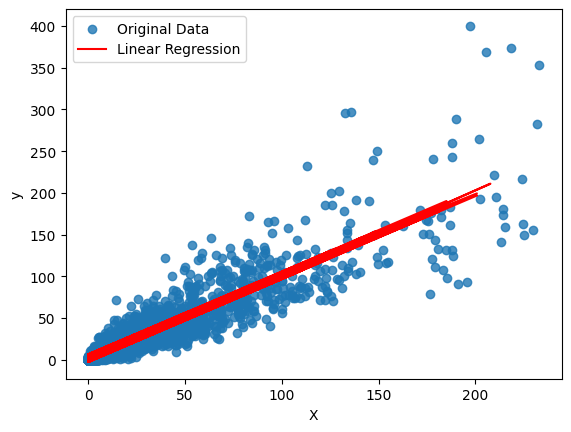

In [27]:
# Plot the data and the linear regression line
plt.scatter(X_train.avg_num_rides_in_area_one_week_before, y_train, alpha=0.8, label='Original Data')
plt.plot(X_test.avg_num_rides_in_area_one_week_before, y_pred, 'r-', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [32]:
r_sq = lin_model.score(X_train, y_train)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {lin_model.intercept_}")
print(f"coefficients: {lin_model.coef_}")

coefficient of determination: 0.8492048238967024
intercept: [1.58632094]
coefficients: [[-0.57465924 -0.02751636  0.99280235  3.93911835 -3.24305677  5.52649181
  -3.27177118 -0.75457874 -0.17375556 -2.0224479 ]]


In [ ]:
root_mse = mean_squared_error(test_evaulation_df.num_of_rides, test_evaulation_df.prediction_int, squared=False)
mae = mean_absolute_error(test_evaulation_df.num_of_rides, test_evaulation_df.prediction_int)

